In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 14 14:54:28 2019

@author: rupesh
"""

'\nCreated on Mon Oct 14 14:54:28 2019\n\n@author: rupesh\n'

## Predict whether or not a female patient will contract diabetes


## Roadmap:
The end objective is a machine learning model that can predict whether or not a female patient will contract diabetes. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:

1. [**Understand the problem**](#problem)
2. [**Exploratory Data Analysis**](#eda)
3. [**Feature Extraction**](#feature)
4. [**Model**](#model)

<a id="problem"></a>
### Understand the problem
Welcome to the another Machine Learning challenge. The objective of this dataset is to develop a Machine Learning model to predict whether or not a female patient will contract diabetes.
<br>
Here, We'll work with the <a href='https://www.kaggle.com/uciml/pima-indians-diabetes-database'>PIMA</a> Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. 
<hr>
A target value of 
<ul>
    <li>0:  indicates that the patient does not have diabetes</li>
    <li>1: indicates that the patient does have diabetes.</li>
</ul>  

#### Imports
We'll use a familiar stack of Data Science libraries such as <b>Pandas</b>, <b>Numpy</b>, <b>Matplotlib</b>, <b>Seaborn</b>, and eventually <b>Sklean</b> for modeling.

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

# Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

<a id='eda'></a>
### Exploratry Data analysis
Read in data and look summary information

In [3]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/sawrupesh04/-Machine-Learning-/master/dataset/diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<b>.info()</b> tell us, 
<ul>
    <li>columns: 9</li>
    <li>training example: 789</li>
    <li> Data Type: <b>float64: 2 and int64: 7</b></li>
</ul>


In [6]:
# Let's get some statistics term 
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


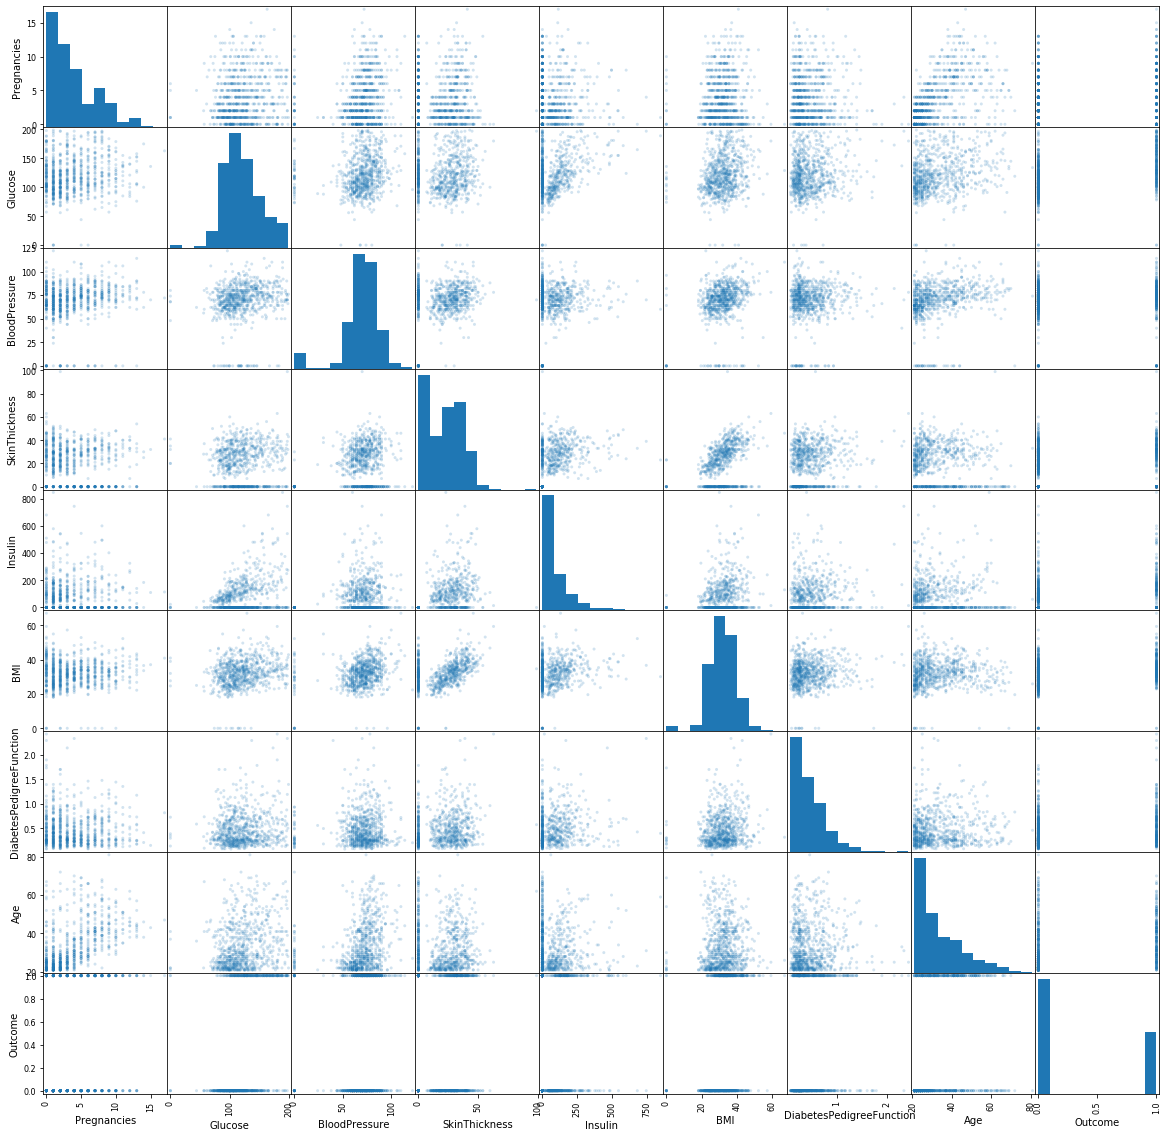

In [7]:
scatter_matrix(diabetes, figsize=(20, 20), alpha=0.2)
plt.show()

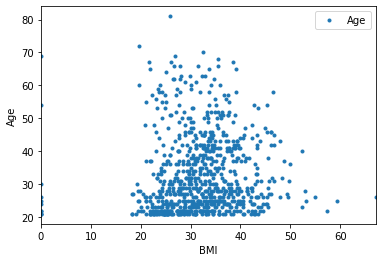

In [8]:
diabetes.plot(x='BMI', y='Age', style='.')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

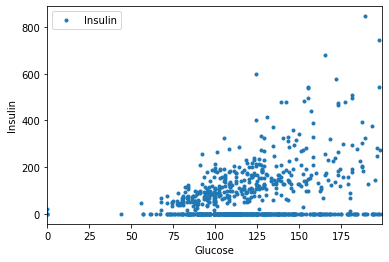

In [9]:
diabetes.plot(x='Glucose', y='Insulin', style='.')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

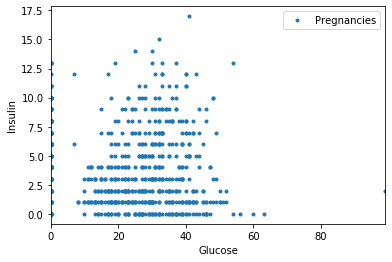

In [10]:
diabetes.plot(x='SkinThickness', y='Pregnancies', style='.')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

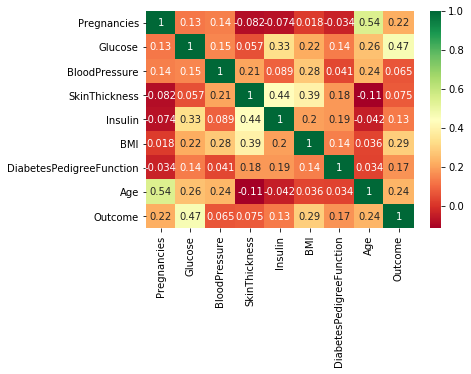

In [11]:
sns.heatmap(diabetes.corr(), cmap='RdYlGn', annot=True)
plt.show()

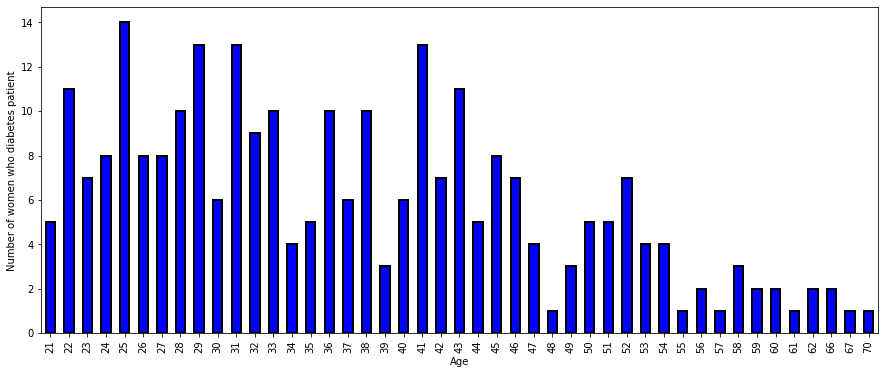

In [12]:
# Plot Number of women who is diabetes patient vs Age
diabetes[diabetes['Outcome']==1]['Age'].value_counts().sort_values().sort_index().plot.bar(color='blue', figsize=(15, 6), edgecolor='k', linewidth=2),
plt.xlabel('Age')
plt.ylabel('Number of women who diabetes patient')
plt.show()


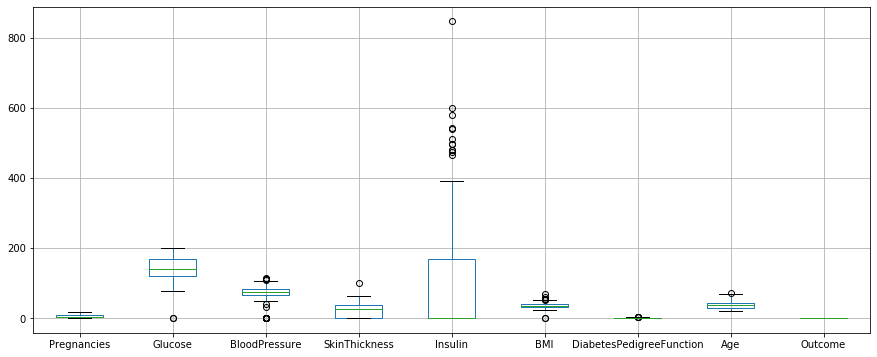

In [13]:
temp = diabetes[diabetes['Outcome']==1]
temp.boxplot(figsize=(15, 6))
plt.show()

<a id='feature'></a>
## Feature

In [14]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [15]:
X = X.apply(lambda x: x/x.max(), axis=0).values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id='model'></a>
# Model
Now we got lot's of understanding and visualization. Let's apply some model and get accuracy. 

#### 1. KNeighbors Classification

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
y_pred = knn.predict(X_test)

In [19]:
knn.score(X_test, y_test)

0.6926406926406926

In [20]:
knn.score(X_train, y_train)

0.8528864059590316

#### 2. Logistic Regression

In [21]:
logreg = LogisticRegression()

In [22]:
logreg.fit(X_train, y_train)

/home/rupesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred_2 = logreg.predict(X_test)

In [24]:
logreg.score(X_test, y_test)

0.7619047619047619

In [25]:
logreg.score(X_train, y_train)

0.770949720670391